<a href="https://colab.research.google.com/github/FranziskoB/Clusters/blob/main/R_Clusters_Exemplo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Cluster Exemplo 4
 Contexto: notas médias de cada uma das 18 lojas para os 3 atributos medidos
 
 As lojas estão divididas em 3 regionais

##Instalando e carregando as bibliotecas

In [ ]:
if(!"kableExtra" %in% installed.packages()){
    install.packages("kableExtra")}
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools")}
if(!"plot3D" %in% installed.packages()){
    install.packages("plot3D")}
if(!"plotly" %in% installed.packages()){
    install.packages("plotly")}   
if(!"reshape2" %in% installed.packages()){
    install.packages("reshape2")} 
if(!"cluster" %in% installed.packages()){
    install.packages("cluster")} 
if(!"factoextra" %in% installed.packages()){
    install.packages("factoextra")} 
if(!"ggrepel" %in% installed.packages()){
    install.packages("ggrepel")} 
if(!"ade4" %in% installed.packages()){
    install.packages("ade4")} 
library(reshape2)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(plot3D)
library(plotly)
library(htmltools)
library(cluster)
library(factoextra)
library(ggrepel)
library(ade4)
library(purrr)
library(tidyverse) 

## Importando, vizualizando e tratando os dados

In [4]:
load(url("https://github.com/FranziskoB/Clusters/raw/main/dados/Regional%20Varejista.RData"))


Contexto: são respostas binárias para 50 perguntas de 35 respondentes

Os respondentes são gestores de empresas em 3 setores distintos

In [20]:
display_html(HTML(RegionalVarejista %>%
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE,
                font_size = 10)))

loja,regional,atendimento,sortimento,organização
01,Regional 3,6,6,4
02,Regional 3,14,2,4
03,Regional 3,8,4,6
04,Regional 3,4,4,4
05,Regional 3,6,6,6
06,Regional 2,38,38,100
07,Regional 1,40,78,38
08,Regional 3,6,4,4
09,Regional 3,4,4,6
10,Regional 3,6,6,2


Estatísticas descritivas

In [7]:
summary(RegionalVarejista)

     loja             regional          atendimento      sortimento   
 Length:18          Length:18          Min.   : 2.00   Min.   : 2.00  
 Class :character   Class :character   1st Qu.: 6.00   1st Qu.: 4.00  
 Mode  :character   Mode  :character   Median :11.00   Median : 6.00  
                                       Mean   :28.11   Mean   :27.89  
                                       3rd Qu.:52.00   3rd Qu.:51.50  
                                       Max.   :78.00   Max.   :86.00  
  organização    
 Min.   :  2.00  
 1st Qu.:  4.00  
 Median :  6.00  
 Mean   : 33.11  
 3rd Qu.: 55.00  
 Max.   :100.00  

Gráfido de dispersão 3D

Warning message:
“Setting row names on a tibble is deprecated.”


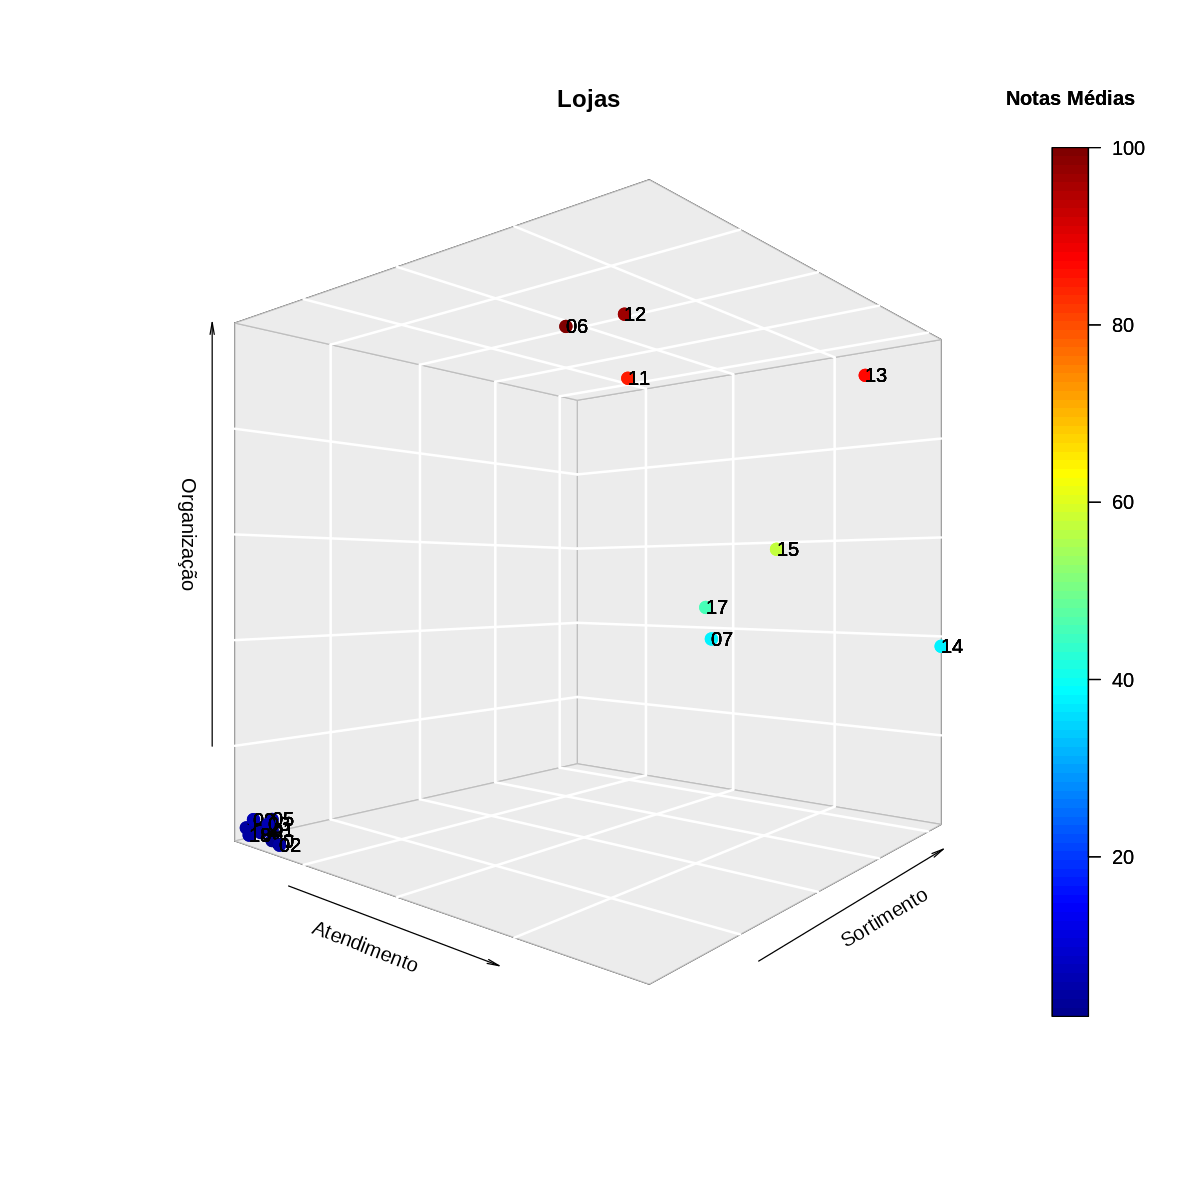

In [14]:
options(repr.plot.width=10, repr.plot.height=10) #Configuração da largura e altura dos plots
rownames(RegionalVarejista) <- RegionalVarejista$loja

scatter3D(x=RegionalVarejista$atendimento,
          y=RegionalVarejista$sortimento,
          z=RegionalVarejista$organização,
          phi = 0, bty = "g", pch = 20, cex = 2,
          xlab = "Atendimento",
          ylab = "Sortimento",
          zlab = "Organização",
          main = "Lojas",
          clab = "Notas Médias")%>%
  text3D(x=RegionalVarejista$atendimento,
         y=RegionalVarejista$sortimento,
         z=RegionalVarejista$organização,
         labels = rownames(RegionalVarejista),
         add = TRUE, cex = 1)

##Esquema de aglomeração hierárquico
Matriz de dissimilaridades




In [16]:
matriz_D <- RegionalVarejista %>% 
  select(atendimento, sortimento, organização) %>% 
  dist(method = "euclidean")


Method: parametrização da distância a ser utilizada

*   "euclidean": distância euclidiana
*   "euclidiana quadrática": elevar ao quadrado matriz_D (matriz_D^2)
*   "maximum": distância de Chebychev;
*   "manhattan": distância de Manhattan (ou distância absoluta ou bloco);
*   "canberra": distância de Canberra;
*   "minkowski": distância de Minkowski


Visualizando a matriz de dissimilaridades

In [19]:
display_html(HTML(data.matrix(matriz_D) %>% 
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE, 
                font_size = 10)))


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0.000000,8.944272,3.464102,2.828427,2.000000,106.13199,86.57944,2.000000,3.464102,2.000000,98.50888,108.33282,121.95081,112.87161,100.59821,4.472136,79.87490,4.000000
8.944272,0.000000,6.633250,10.198039,9.165151,105.29957,87.22385,8.246211,10.392305,9.165151,96.04166,106.32027,119.43199,110.94143,99.95999,12.165525,78.25599,8.000000
3.464102,6.633250,0.000000,4.472136,2.828427,104.36474,86.74099,2.828427,4.000000,4.898980,96.43651,106.30146,120.34949,112.46333,100.02000,6.324555,78.99367,3.464102
2.828427,10.198039,4.472136,0.000000,3.464102,107.36852,89.03932,2.000000,2.000000,3.464102,100.03999,109.72693,124.00000,115.56816,102.95630,2.000000,82.29216,2.828427
2.000000,9.165151,2.828427,3.464102,0.000000,104.32641,85.81375,2.828427,2.828427,4.000000,96.85040,106.60206,120.58192,112.28535,99.53894,4.898980,78.84161,4.472136
106.131993,105.299573,104.364745,107.368524,104.326411,0.00000,73.81057,106.752049,105.584090,107.944430,22.09072,14.69694,45.51923,88.02272,58.85576,108.018517,58.61740,107.405773
86.579443,87.223850,86.740994,89.039317,85.813752,73.81057,0.00000,88.249646,88.294960,87.384209,67.94115,75.36577,64.18723,38.83298,24.49490,89.866568,26.30589,89.933309
2.000000,8.246211,2.828427,2.000000,2.828427,106.75205,88.24965,0.000000,2.828427,2.828427,99.05554,108.86689,122.84950,114.29786,102.00000,4.000000,81.14185,2.000000
3.464102,10.392305,4.000000,2.000000,2.828427,105.58409,88.29496,2.828427,0.000000,4.898980,98.40732,108.01852,122.65398,114.99565,101.92154,2.828427,81.28961,3.464102
2.000000,9.165151,4.898980,3.464102,4.000000,107.94443,87.38421,2.828427,4.898980,0.000000,100.17984,110.07270,123.33694,113.49009,101.68579,4.898980,80.94443,4.472136


 Elaboração da clusterização hierárquica

In [21]:
cluster_hier <- agnes(x = matriz_D, method = "single")

Method é o tipo de encadeamento:
  *   "complete": encadeamento completo (furthest neighbor ou complete linkage)
*   "single": encadeamento único (nearest neighbor ou single linkage)
*   "average": encadeamento médio (between groups ou average linkage)

Definição do esquema hierárquico de aglomeração

In [22]:
coeficientes <- sort(cluster_hier$height, decreasing = FALSE) 
coeficientes

[1]  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000
 [8]  2.828427  6.633250 12.328828 14.696938 23.409400 24.494897 32.802439
[15] 35.665109 40.496913 78.255990

Tabela com o esquema de aglomeração. Interpretação do output:

*   As linhas são os estágios de aglomeração
*   Nas colunas Cluster1 e Cluster2, observa-se como ocorreu a junção
*   Quando for número negativo, indica observação isolada
*   Quando for número positivo, indica cluster formado anteriormente (estágio)
*   Coeficientes: as distâncias para as combinações em cada estágio


In [24]:
esquema <- as.data.frame(cbind(cluster_hier$merge, coeficientes))
names(esquema) <- c("Cluster1", "Cluster2", "Coeficientes")

display_html(HTML(esquema %>%
  kable(row.names = T) %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE, 
                font_size = 10)))

,Cluster1,Cluster2,Coeficientes
1,-8,-18,2.000000
2,-4,-16,2.000000
3,2,-9,2.000000
4,3,1,2.000000
5,-1,-10,2.000000
6,5,-5,2.000000
7,6,4,2.000000
8,7,-3,2.828427
9,8,-2,6.633250
10,-11,-12,12.328828


Construção do dendrograma

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


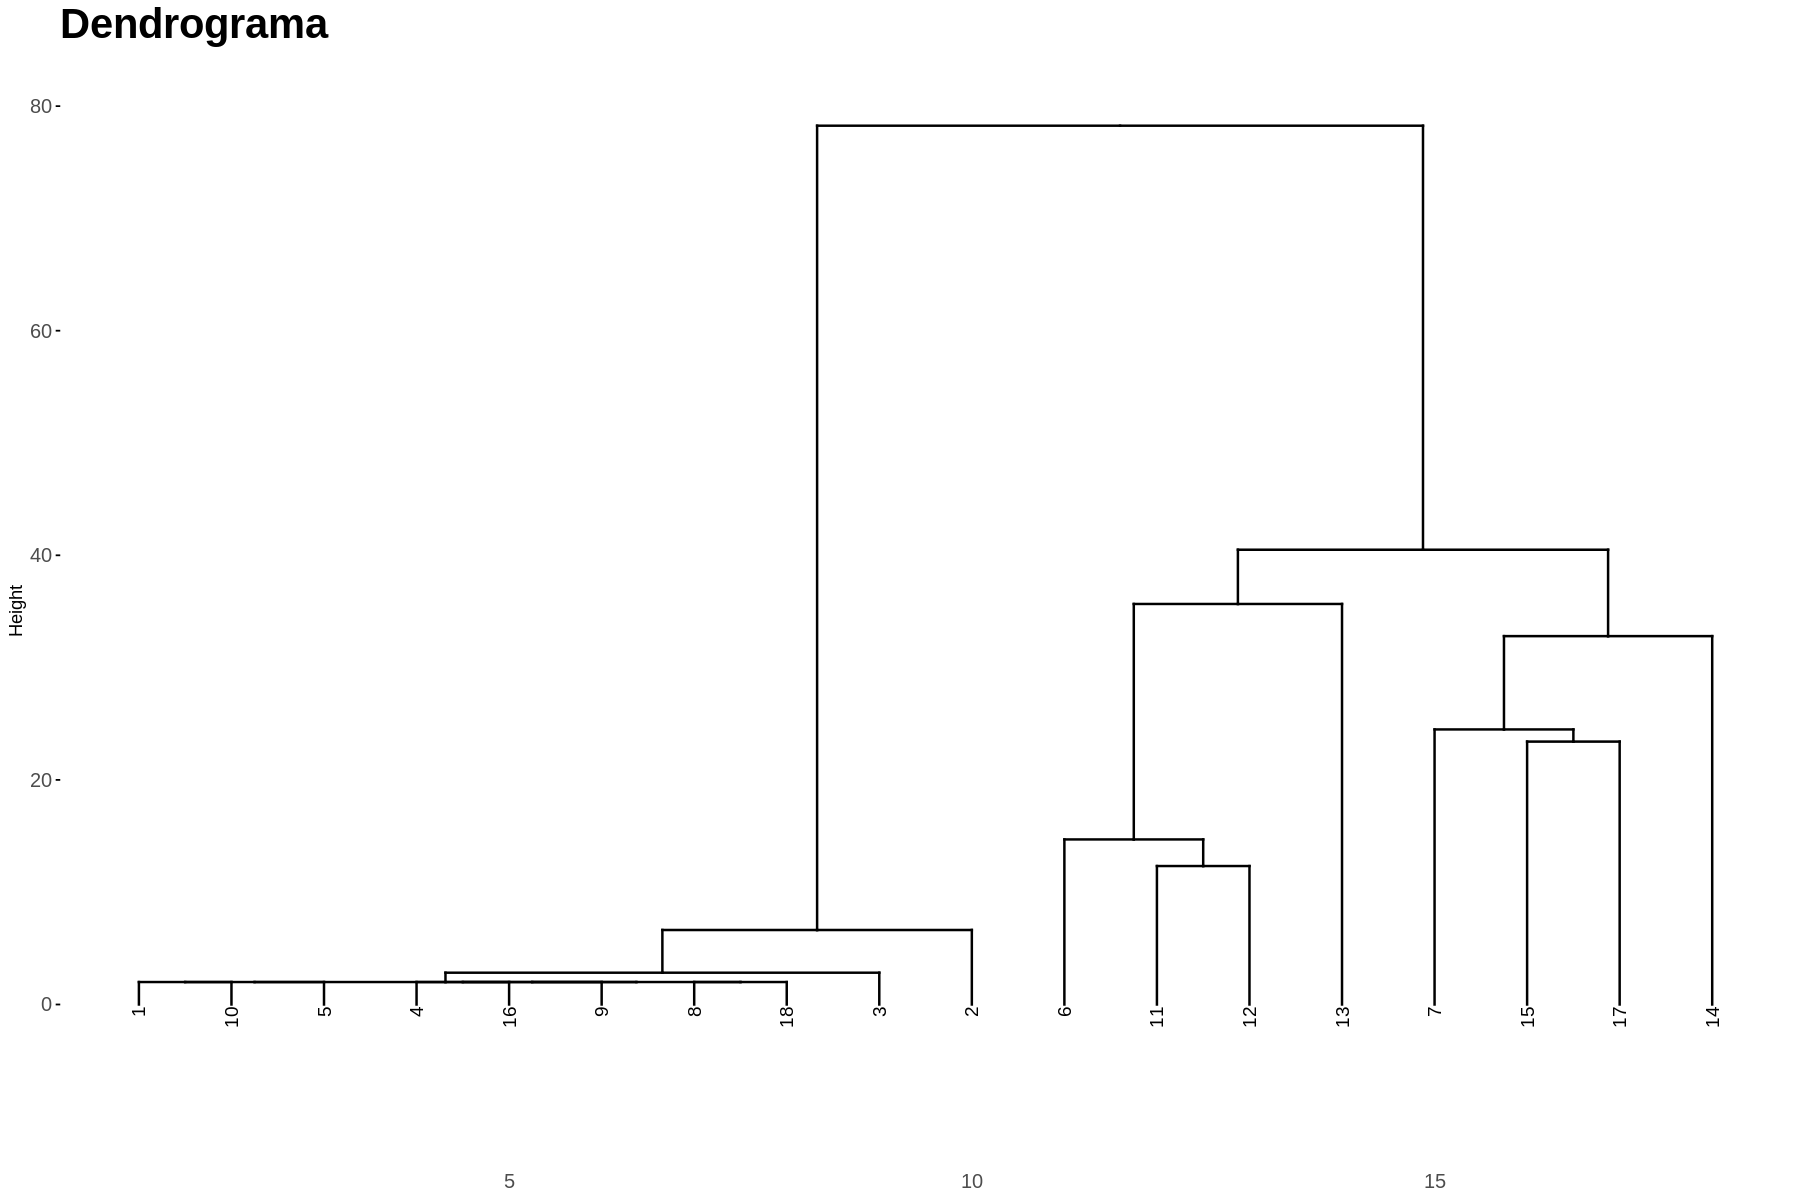

In [34]:
options(repr.plot.width=15, repr.plot.height=10) #Configuração da largura e altura dos plots
fviz_dend(x = cluster_hier, show_labels = T,main = "") +
ggtitle("Dendrograma") +
ylim(-10,80) +
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

Dendrograma com visualização dos clusters

Parametrizando 3 clusters 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


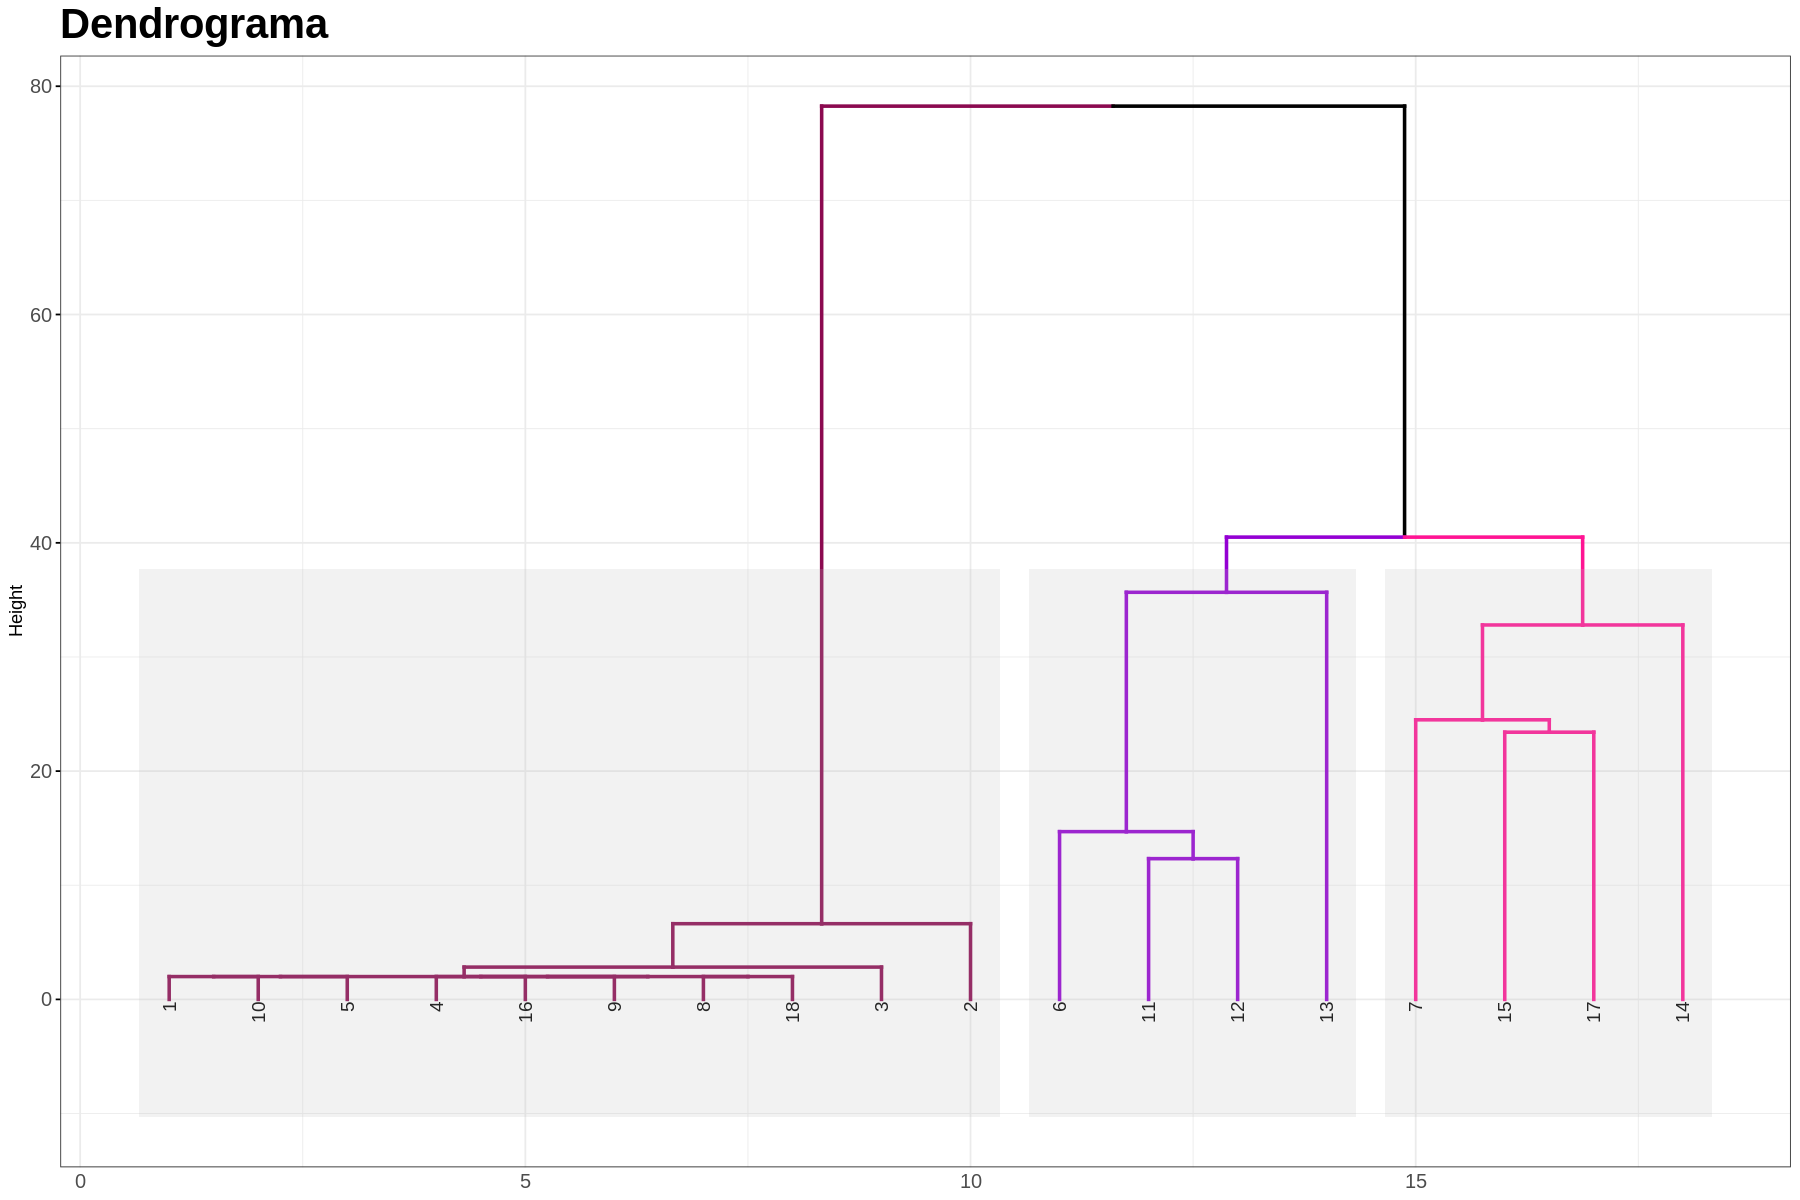

In [29]:
fviz_dend(x = cluster_hier,
          k = 3,
          k_colors = c("deeppink4", "darkviolet", "deeppink"),
          color_labels_by_k = F,
          rect = T,
          rect_fill = T,
          lwd = 1,
          ggtheme = theme_bw()) +
ggtitle("Dendrograma") +
  
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

Criando variável categórica para indicação do cluster no banco de dados

 O argumento 'k' indica a quantidade de clusters

In [31]:
RegionalVarejista$cluster_H <- factor(cutree(tree = cluster_hier, k = 3))

Visualização da base de dados com a alocação das observações nos clusters

In [33]:
display_html(HTML(RegionalVarejista %>%
  select(regional, cluster_H) %>% 
  arrange(regional) %>% 
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE,
                font_size = 10)
))

regional,cluster_H
Regional 1,3
Regional 1,3
Regional 1,3
Regional 1,3
Regional 2,2
Regional 2,2
Regional 2,2
Regional 2,2
Regional 3,1
Regional 3,1


## Estatísticas descritivas dos clusters por variável

Estatísticas descritivas da variável 'atendimento'

In [35]:
group_by(RegionalVarejista, cluster_H) %>%
  summarise(
    mean = mean(atendimento, na.rm = TRUE),
    sd = sd(atendimento, na.rm = TRUE),
    min = min(atendimento, na.rm = TRUE),
    max = max(atendimento, na.rm = TRUE))

cluster_H,mean,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.2,3.190263,2,14
2,55.0,15.705625,38,76
3,56.0,15.916449,40,78


Estatísticas descritivas da variável 'sortimento'

In [36]:
group_by(RegionalVarejista, cluster_H) %>%
  summarise(
    mean = mean(sortimento, na.rm = TRUE),
    sd = sd(sortimento, na.rm = TRUE),
    min = min(sortimento, na.rm = TRUE),
    max = max(sortimento, na.rm = TRUE))

cluster_H,mean,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.2,1.47573,2,6
2,41.0,12.90994,32,60
3,74.0,12.75408,56,86


Estatísticas descritivas da variável 'organização'

In [37]:
group_by(RegionalVarejista, cluster_H) %>%
  summarise(
    mean = mean(organização, na.rm = TRUE),
    sd = sd(organização, na.rm = TRUE),
    min = min(organização, na.rm = TRUE),
    max = max(organização, na.rm = TRUE))

cluster_H,mean,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.4,1.264911,2,6
2,93.0,7.023769,86,100
3,45.0,9.451631,38,58


## Análise de variância de um fator (ANOVA). Interpretação do output:


*   Mean Sq do cluster_H: indica a variabilidade entre grupos
*   Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
*   F value: estatística de teste (Sum Sq do cluster_H / Sum Sq dos Residuals)
*   Pr(>F): p-valor da estatística 
*   p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

A variável mais discriminante dos grupos contém maior estatística F (e significativa)

In [38]:

# ANOVA da variável 'atendimento'
summary(anova_atendimento <- aov(formula = atendimento ~ cluster_H,
                                 data = RegionalVarejista))

            Df Sum Sq Mean Sq F value   Pr(>F)    
cluster_H    2  10804    5402   50.91 2.06e-07 ***
Residuals   15   1592     106                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [39]:
# ANOVA da variável 'sortimento'
summary(anova_sortimento <- aov(formula = sortimento ~ cluster_H,
                                data = RegionalVarejista))

            Df Sum Sq Mean Sq F value   Pr(>F)    
cluster_H    2  14804    7402   110.2 1.08e-09 ***
Residuals   15   1008      67                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [40]:
# ANOVA da variável 'organização'
summary(anova_organiza <- aov(formula = organização ~ cluster_H,
                              data = RegionalVarejista))

            Df Sum Sq Mean Sq F value  Pr(>F)    
cluster_H    2  23155   11578   403.5 9.1e-14 ***
Residuals   15    430      29                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Vamos realizar uma análise de robustez do resultado anterior
 Vamos alterar a medida de distância e o método de encadeamento


Elaboração da matriz de distâncias com a distância de 'Manhattan'

In [41]:
matriz_DM <- RegionalVarejista %>% 
  select(atendimento, sortimento, organização) %>% 
  dist(method = "manhattan")


 Clusterização hierárquica com método 'complete'

In [42]:
cluster_hier_man <- agnes(x = matriz_DM, method = "complete")

cluster_hier_man <- agnes(x = matriz_DM, method = "complete")

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


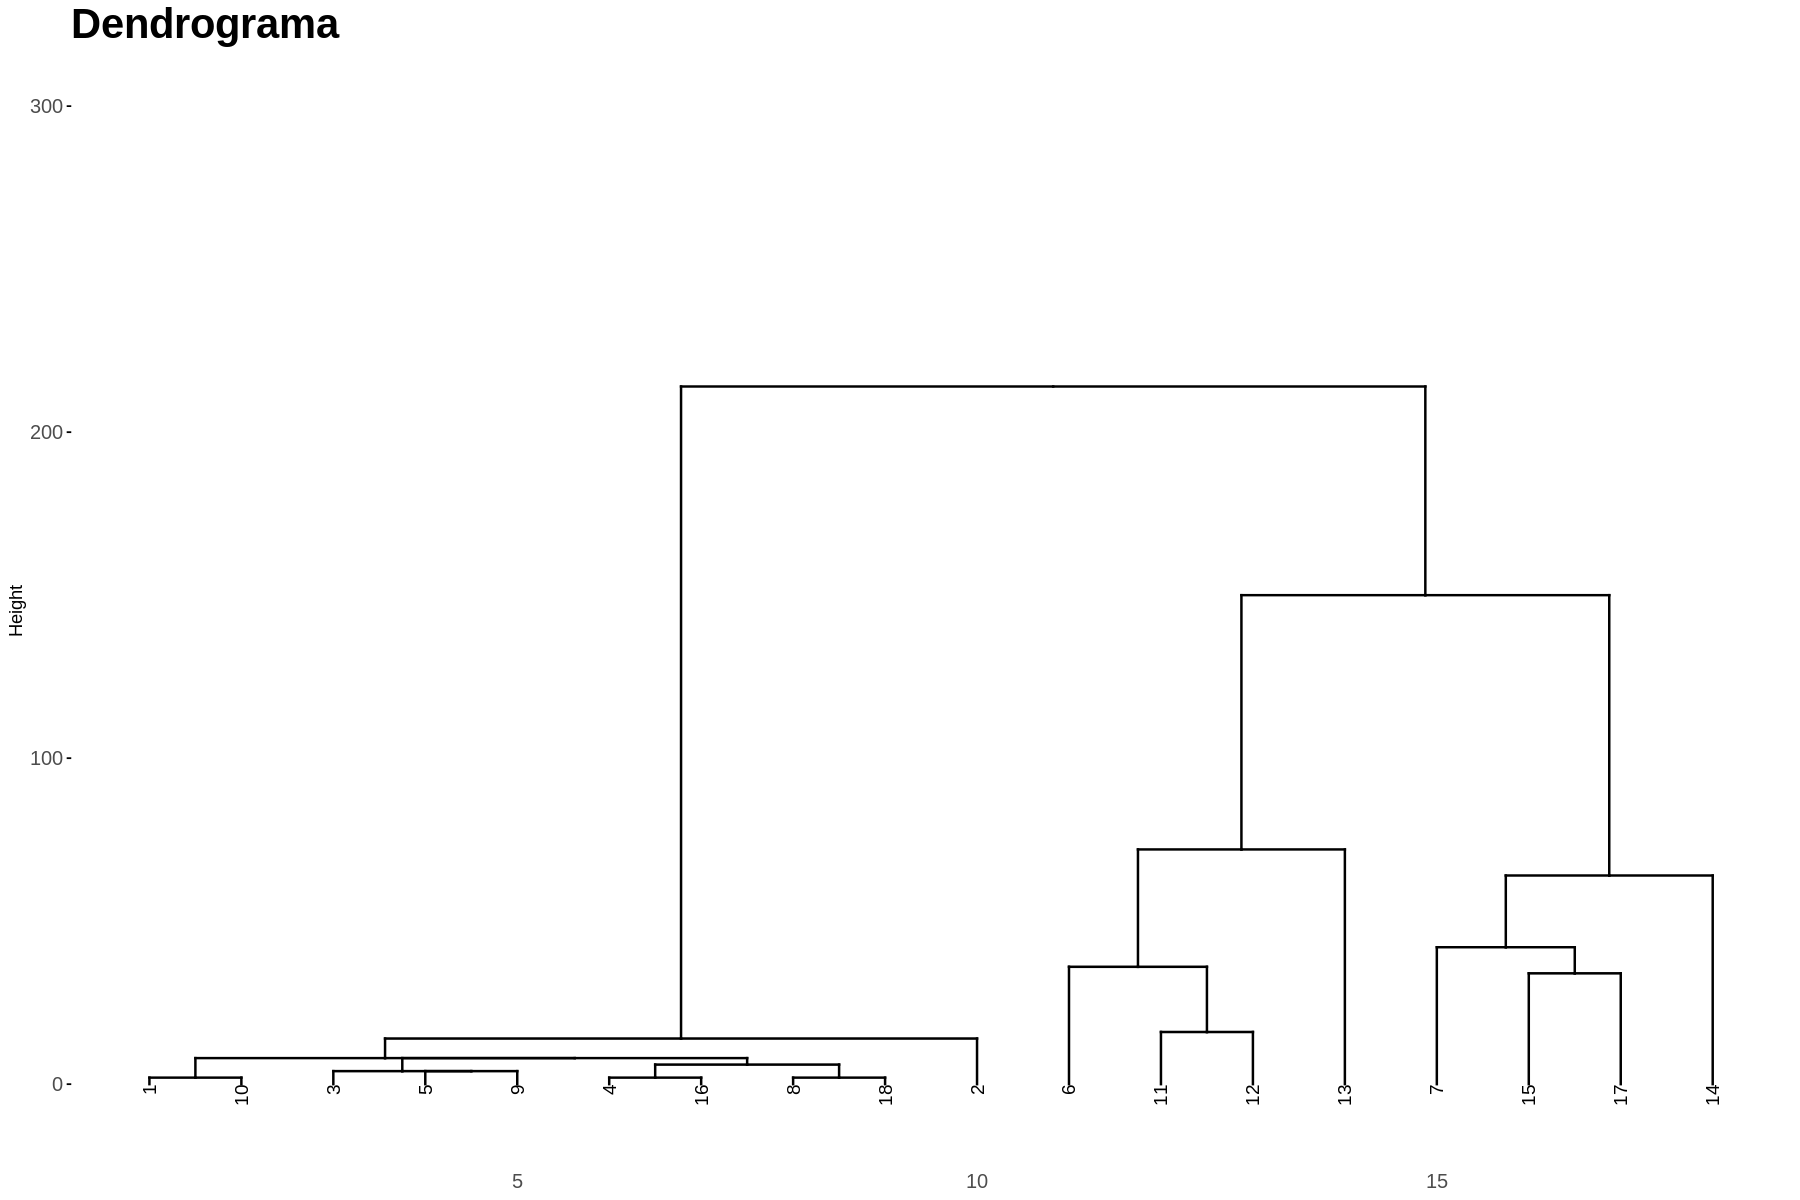

In [46]:
fviz_dend(x = cluster_hier_man, show_labels = T,main = "") +
ggtitle("Dendrograma") +
ylim(-10,300) +
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

De fato, o resultado também aponta para 3 clusters

Definindo 3 clusters para comparar com regionais

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


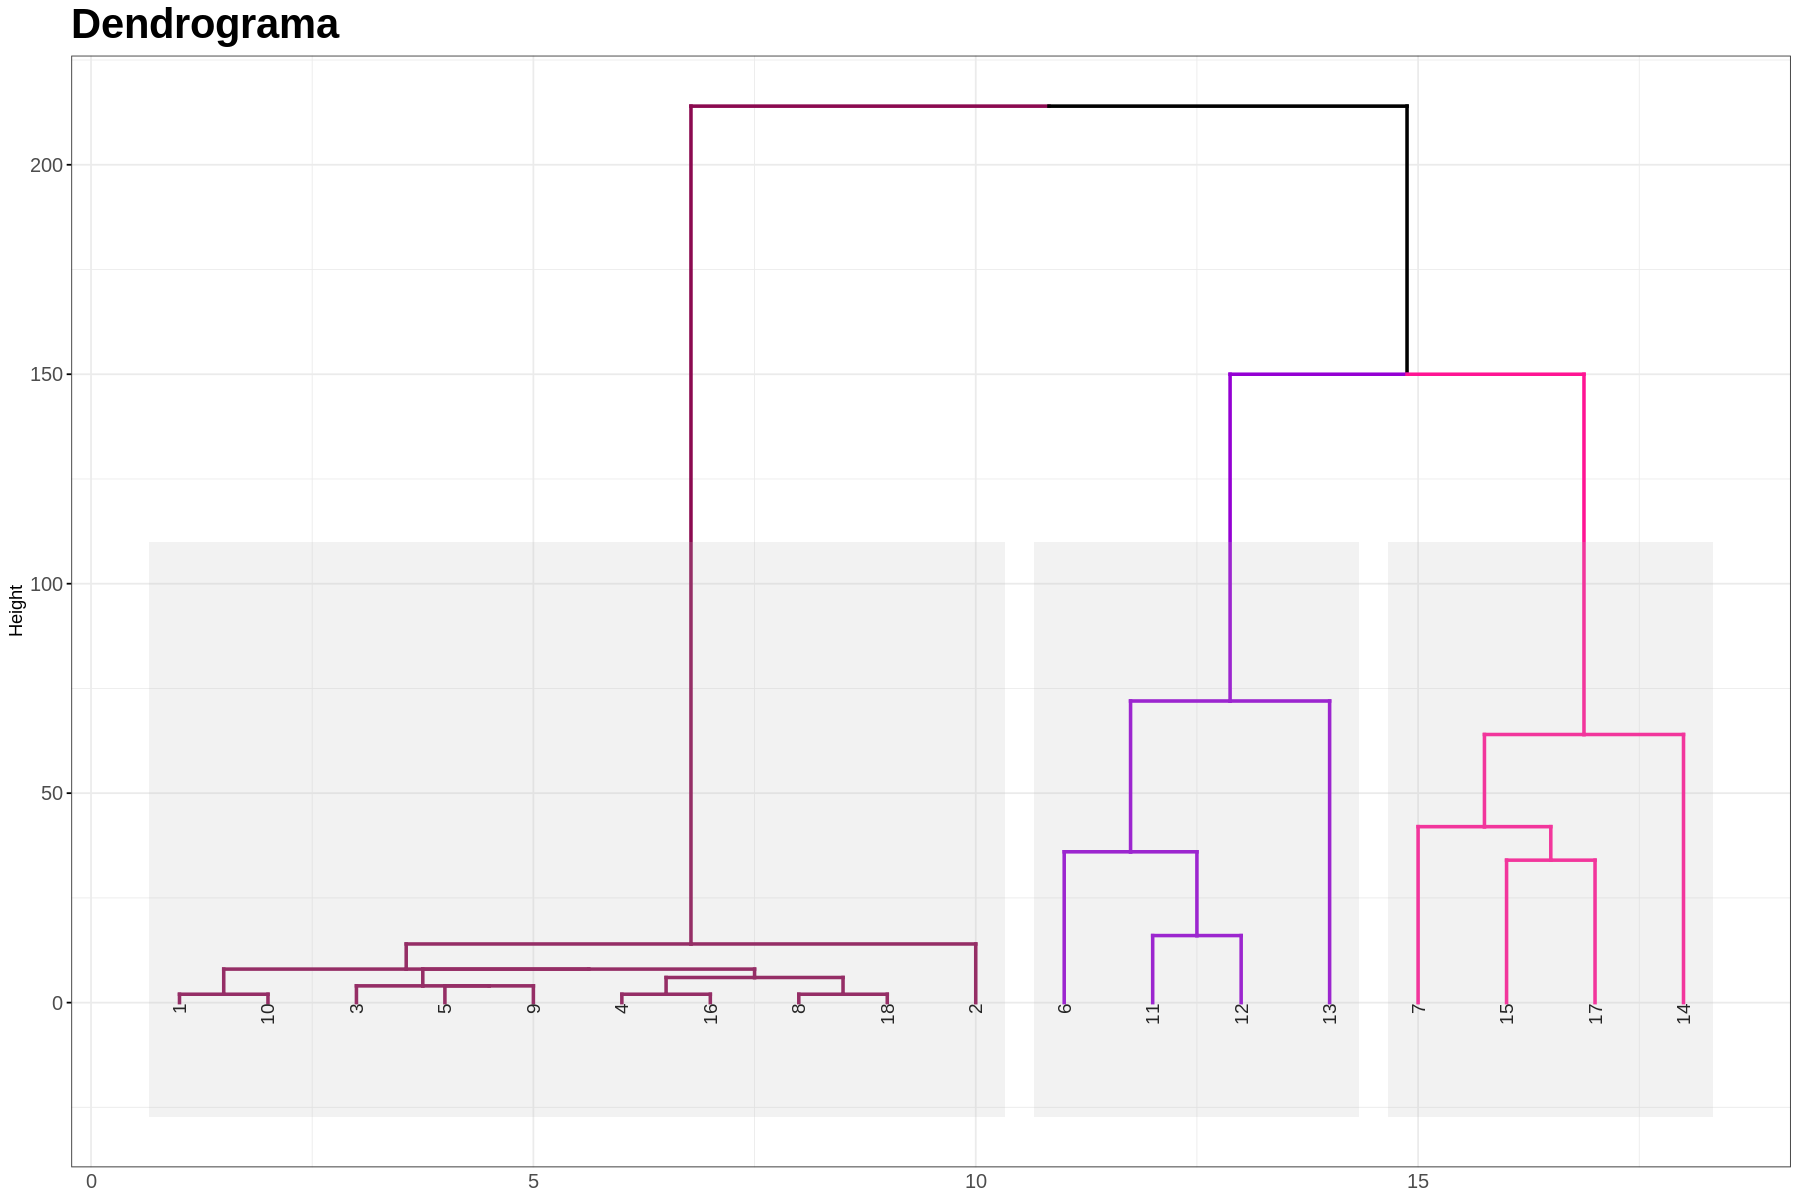

In [47]:
fviz_dend(x = cluster_hier_man,
          k = 3,
          k_colors = c("deeppink4", "darkviolet", "deeppink"),
          color_labels_by_k = F,
          rect = T,
          rect_fill = T,
          lwd = 1,
          ggtheme = theme_bw()) +
ggtitle("Dendrograma") +
  
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

 Adicionando a variável ao banco de dados

In [50]:
RegionalVarejista$cluster_H_man <- factor(cutree(tree = cluster_hier_man, k = 3))
display_html(HTML(RegionalVarejista %>%
  select(regional, cluster_H, cluster_H_man) %>% 
  arrange(regional) %>% 
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE,
                font_size = 10)
))

regional,cluster_H,cluster_H_man
Regional 1,3,3
Regional 1,3,3
Regional 1,3,3
Regional 1,3,3
Regional 2,2,2
Regional 2,2,2
Regional 2,2,2
Regional 2,2,2
Regional 3,1,1
Regional 3,1,1


##Esquema de aglomeração não hierárquico K-MEANS

Elaboração da clusterização não hieráquica k-means

In [55]:
cluster_kmeans <- kmeans(RegionalVarejista[,3:5],
                         centers = 3)

Criando variável categórica para indicação do cluster no banco de dados

In [60]:
RegionalVarejista$cluster_K <- factor(cluster_kmeans$cluster)

 Criando variável categórica para indicação do cluster no banco de dados

In [61]:
RegionalVarejista$cluster_K <- factor(cluster_kmeans$cluster)

Método de Elbow para identificação do número ótimo de clusters

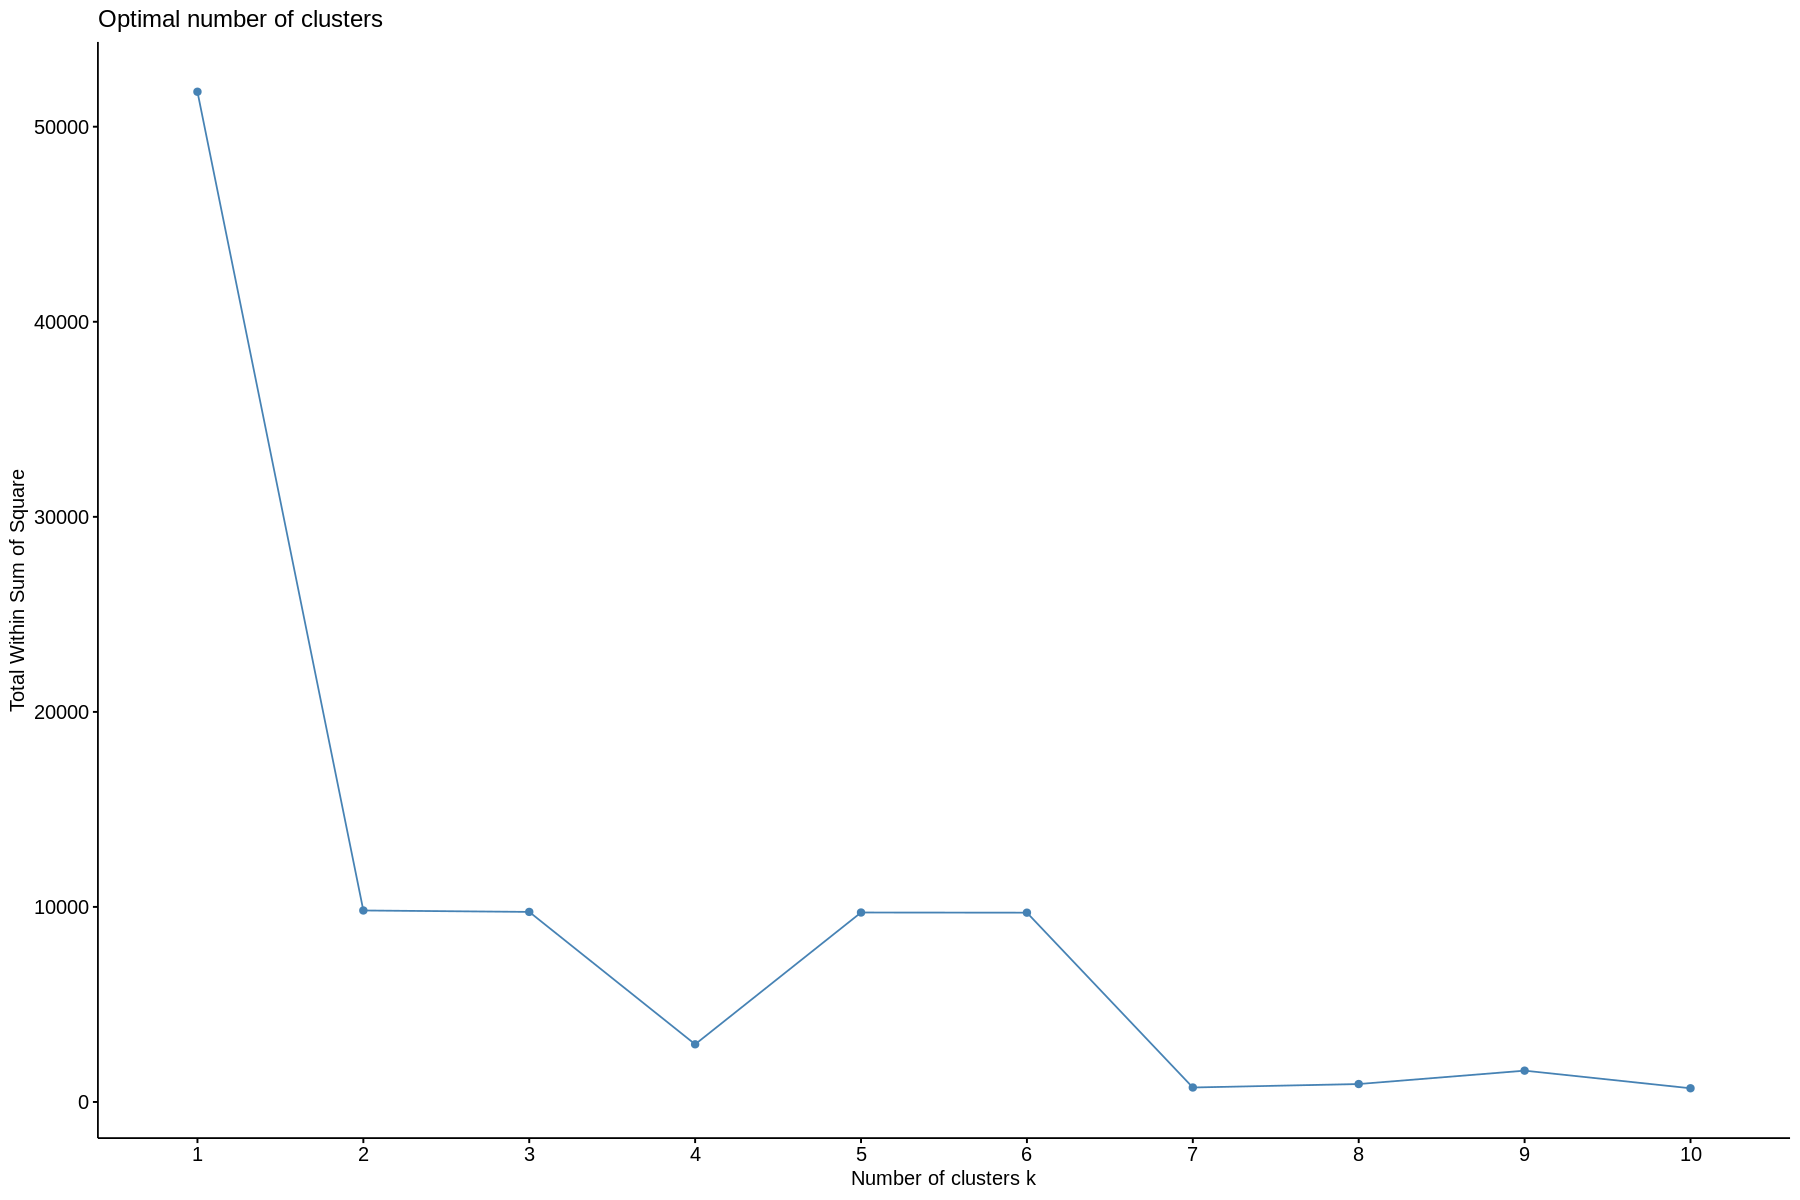

In [62]:
fviz_nbclust(RegionalVarejista[,3:5], kmeans, method = "wss", k.max = 10)


 Visualização da base de dados

In [63]:
RegionalVarejista$cluster_H_man <- factor(cutree(tree = cluster_hier_man, k = 3))
display_html(HTML(RegionalVarejista %>%
  select(regional, cluster_H, cluster_H_man,cluster_K) %>% 
  arrange(regional) %>% 
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE,
                font_size = 10)
))

regional,cluster_H,cluster_H_man,cluster_K
Regional 1,3,3,2
Regional 1,3,3,2
Regional 1,3,3,2
Regional 1,3,3,2
Regional 2,2,2,1
Regional 2,2,2,1
Regional 2,2,2,1
Regional 2,2,2,1
Regional 3,1,1,3
Regional 3,1,1,3


Análise de variância de um fator (ANOVA)

In [64]:
# ANOVA da variável 'atendimento'
summary(anova_atendimento <- aov(formula = atendimento ~ cluster_K,
                                 data = RegionalVarejista))

            Df Sum Sq Mean Sq F value   Pr(>F)    
cluster_K    2  10804    5402   50.91 2.06e-07 ***
Residuals   15   1592     106                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [65]:
# ANOVA da variável 'sortimento'
summary(anova_sortimento <- aov(formula = sortimento ~ cluster_K,
                                data = RegionalVarejista))

            Df Sum Sq Mean Sq F value   Pr(>F)    
cluster_K    2  14804    7402   110.2 1.08e-09 ***
Residuals   15   1008      67                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [66]:
# ANOVA da variável 'organização'
summary(anova_organiza <- aov(formula = organização ~ cluster_K,
                              data = RegionalVarejista))


            Df Sum Sq Mean Sq F value  Pr(>F)    
cluster_K    2  23155   11578   403.5 9.1e-14 ***
Residuals   15    430      29                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1